**Part 1 of Lab 01:**

In [1]:
import pandas as pd

data = pd.read_csv('anemia.csv')
len_data = len(data)
len_data

1421

In [2]:
data.head(10)

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0
5,0,11.6,22.3,30.9,74.5,1
6,1,12.7,19.5,28.9,82.9,1
7,1,12.7,28.5,28.2,92.3,1
8,0,14.1,29.7,30.5,75.2,0
9,1,14.9,25.8,31.3,82.9,0


In [5]:
print(data['Result'].value_counts()[1])

620


In [6]:
print(data['Result'].value_counts()[0])

801


In [7]:
# Differentiating the features from the target column 
# X -> data input to the model, y -> target/label

X = data.iloc[ : , 0:5]
y = data.iloc[ : , 5:6]

In [ ]:
X.head(10)

In [ ]:
y.head(10)

In [8]:
# Create the train/test split and preprocess
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Standardize data
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

In [9]:
# Setting hyperparameters to Train NN model -> Multi Layer Perceptron (MLP)
# Change the hyperparameters to experiment with the model

n_neurons_10 = 10
n_neurons_20 = 20
n_neurons_30= 30
n_neurons_100 = 100
n_neurons_50 = 50

# Activation functions -> 'logistic', 'tanh', 'relu', 'identity

activation_function_1 = 'logistic'
activation_function_2 = 'tanh'
activation_function_3 = 'relu'
activation_function_4 = 'identity'


In [10]:
# Training and Testing the NN model  -> Multi Layer Perceptron (MLP)

from sklearn.neural_network import MLPClassifier
from sklearn import metrics

# Choose the hyper parameters to experiment with different models
# Activations functions -> 1. logitic/sigmoid, 2. tanh, 3. relu, 4. identity 
# Number of hidden Layers -> 1/2/3 
# No. of neurons per layer = 10/20/30/50/100

mlp = MLPClassifier(activation=activation_function_4, hidden_layer_sizes=(10,20), max_iter=25)
mlp.fit(X_train_std, y_train)

print('Activation function: {}'.format(mlp.activation))
print("Accuracy score on the test set: {}".format(mlp.score(X_test_std, y_test)))

y_pred = mlp.predict(X_test_std)
print(metrics.classification_report(y_test, y_pred))


Activation function: identity
Accuracy score on the test set: 0.9625292740046838
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       219
           1       0.98      0.94      0.96       208

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(91.68, 0.5, 'Predicted label')

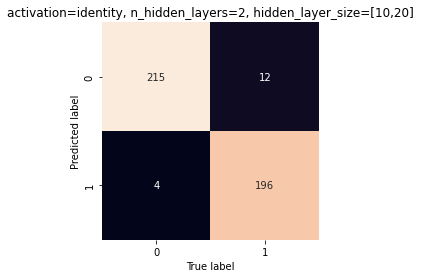

In [11]:
#Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

mat = metrics.confusion_matrix(y_test, y_pred)
plt.title('activation=identity, n_hidden_layers=2, hidden_layer_size=[10,20]')
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("True label")
plt.ylabel("Predicted label")